In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df=pd.read_csv('movies.csv')
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [3]:
df.tail()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN
9998,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [4]:
df.describe(include='all')

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
count,9999,9355,9919,8179.000000,9999,9999,8179,7041.000000,460
unique,6817,438,510,NaN,8688,7877,4129,NaN,332
top,Bleach: Burîchi,(2020– ),\nComedy,NaN,\nAdd a Plot\n,\n,7,NaN,$0.01M
freq,65,892,852,NaN,1265,456,35,NaN,22
mean,NaN,NaN,NaN,6.921176,NaN,NaN,NaN,68.688539,NaN
std,NaN,NaN,NaN,1.220232,NaN,NaN,NaN,47.258056,NaN
min,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,6.200000,NaN,NaN,NaN,36.000000,NaN
50%,NaN,NaN,NaN,7.100000,NaN,NaN,NaN,60.000000,NaN
75%,NaN,NaN,NaN,7.800000,NaN,NaN,NaN,95.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [6]:
df=df.drop(['Gross'],axis=1)

In [7]:
df.duplicated().sum()#subset="MOVIES"

431

In [8]:
df.drop_duplicates(keep='first',inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9568 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9568 non-null   object 
 1   YEAR      9026 non-null   object 
 2   GENRE     9490 non-null   object 
 3   RATING    8168 non-null   float64
 4   ONE-LINE  9568 non-null   object 
 5   STARS     9568 non-null   object 
 6   VOTES     8168 non-null   object 
 7   RunTime   7008 non-null   float64
dtypes: float64(2), object(6)
memory usage: 672.8+ KB


In [11]:
df.isnull().sum()

MOVIES         0
YEAR         542
GENRE         78
RATING      1400
ONE-LINE       0
STARS          0
VOTES       1400
RunTime     2560
dtype: int64

In [12]:
df=df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6779 entries, 0 to 9963
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    6779 non-null   object 
 1   YEAR      6779 non-null   object 
 2   GENRE     6779 non-null   object 
 3   RATING    6779 non-null   float64
 4   ONE-LINE  6779 non-null   object 
 5   STARS     6779 non-null   object 
 6   VOTES     6779 non-null   object 
 7   RunTime   6779 non-null   float64
dtypes: float64(2), object(6)
memory usage: 476.6+ KB


In [14]:
df['YEAR']=df['YEAR'].str.slice(start=1, stop=-1)

In [15]:
df['year_start']=df['YEAR'].str.slice(start=0,stop=4)
df['year_start']=df.year_start.str.strip('I) (VX ')
for i in (df.year_start.loc[df['year_start']=='']).index:
    df=df.drop(i,axis=0)
df['year_start'] = df['year_start'].astype(int)

In [16]:
df['year_end']=df['YEAR'].str.slice(start=5)
df['year_end']=df.year_end.str.strip('I) (VX TV Special Mov dabcdefghijklmnopqrstuvwxyz')
df['year_end']=df['year_end'].replace(r'^\s*$', np.nan, regex=True)
#df['year_end'] = df['year_end'].astype(int)

In [17]:
df=df.drop(['YEAR'],axis=1)

In [18]:
df['year_start']

0       2021
1       2021
2       2010
3       2013
5       2020
        ... 
9959    2021
9960    2021
9961    2021
9962    2021
9963    2017
Name: year_start, Length: 6524, dtype: int32

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6524 entries, 0 to 9963
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MOVIES      6524 non-null   object 
 1   GENRE       6524 non-null   object 
 2   RATING      6524 non-null   float64
 3   ONE-LINE    6524 non-null   object 
 4   STARS       6524 non-null   object 
 5   VOTES       6524 non-null   object 
 6   RunTime     6524 non-null   float64
 7   year_start  6524 non-null   int32  
 8   year_end    1159 non-null   object 
dtypes: float64(2), int32(1), object(6)
memory usage: 484.2+ KB


In [20]:
df=df.reset_index(drop=True)

In [21]:
df['GENRE']=df['GENRE'].str.strip()
df['ONE-LINE']=df['ONE-LINE'].str.strip()
df['STARS']=df['STARS'].str.replace('\n',"")

In [22]:
df["RATING"].loc[1015]=4.1

C:\Users\abodk222\AppData\Local\Temp/ipykernel_8568/3078242933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RATING"].loc[1015]=4.1


In [23]:
df['VOTES'] = df.VOTES.str.replace(',','')
df['VOTES'] = pd.to_numeric(df['VOTES'])
df['VOTES'] = df['VOTES'].astype(int)
df[['VOTES']].describe(include='all')

,VOTES
count,6.524000e+03
mean,1.751153e+04
std,7.606660e+04
min,5.000000e+00
25%,2.807500e+02
50%,1.191500e+03
75%,4.870000e+03
max,1.713028e+06


In [24]:
df

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,year_start,year_end
0,Blood Red Sky,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,21062,121.0,2021,NaN
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...",17870,25.0,2021,NaN
2,The Walking Dead,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...",885805,44.0,2010,2022
3,Rick and Morty,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...",414849,23.0,2013,NaN
4,Outer Banks,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cl...",25858,50.0,2020,NaN
...,...,...,...,...,...,...,...,...,...
6519,Sexify,"Comedy, Drama",6.8,"Monika's idea for gathering data is a hit, but...",Director:Kalina Alabrudzinska| Stars:A...,108,38.0,2021,NaN
6520,Sexify,"Comedy, Drama",7.1,After facing their parents at Easter breakfast...,Director:Kalina Alabrudzinska| Stars:A...,103,37.0,2021,NaN
6521,Sexify,"Comedy, Drama",6.9,After getting an anonymous tip about the copul...,Director:Kalina Alabrudzinska| Stars:A...,96,40.0,2021,NaN
6522,Sexify,"Comedy, Drama",7.1,The big pitch at the university tech competiti...,Director:Kalina Alabrudzinska| Stars:A...,100,47.0,2021,NaN


In [25]:
df.describe(include='all')

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,year_start,year_end
count,6524,6524,6524.000000,6524,6524,6.524000e+03,6524.000000,6524.000000,1159
unique,4914,456,NaN,6373,5691,NaN,NaN,NaN,34
top,Bleach: Burîchi,Comedy,NaN,Add a Plot,,NaN,NaN,NaN,2020
freq,65,572,NaN,139,29,NaN,NaN,NaN,336
mean,NaN,NaN,6.893072,NaN,NaN,1.751153e+04,68.407572,2015.250307,NaN
std,NaN,NaN,1.239157,NaN,NaN,7.606660e+04,47.576807,8.208051,NaN
min,NaN,NaN,1.100000,NaN,NaN,5.000000e+00,1.000000,1932.000000,NaN
25%,NaN,NaN,6.200000,NaN,NaN,2.807500e+02,35.000000,2014.000000,NaN
50%,NaN,NaN,7.100000,NaN,NaN,1.191500e+03,60.000000,2018.000000,NaN
75%,NaN,NaN,7.800000,NaN,NaN,4.870000e+03,94.000000,2019.000000,NaN


In [26]:
#df['year_start']=df['year_start'][(np.abs(stats.zscore(df['year_start'])) < 3)]

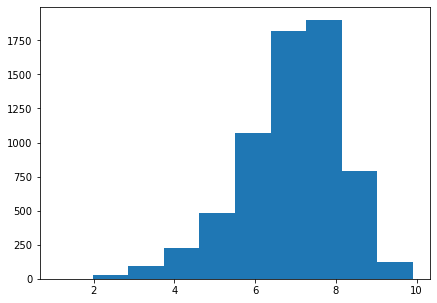

In [27]:
df
plt.figure(figsize=(7,5))
plt.hist(df['RATING'])
plt.show()

In [28]:
df=df[df['RATING']>3]

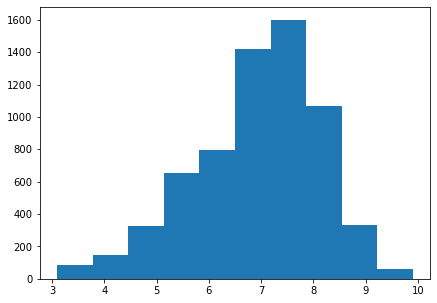

In [29]:
plt.figure(figsize=(7,5))
plt.hist(df['RATING'])
plt.show()

In [30]:
df.isnull().sum()

MOVIES           0
GENRE            0
RATING           0
ONE-LINE         0
STARS            0
VOTES            0
RunTime          0
year_start       0
year_end      5331
dtype: int64

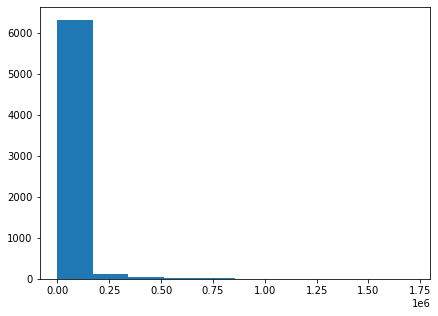

In [31]:
plt.figure(figsize=(7,5))
plt.hist(df['VOTES'])
plt.show()

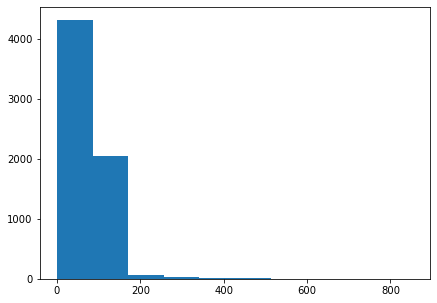

In [32]:
plt.figure(figsize=(7,5))
plt.hist(df['RunTime'])
plt.show()

In [33]:
qruntime=df['RunTime'].quantile(0.95)
df=df[df['RunTime']<qruntime]

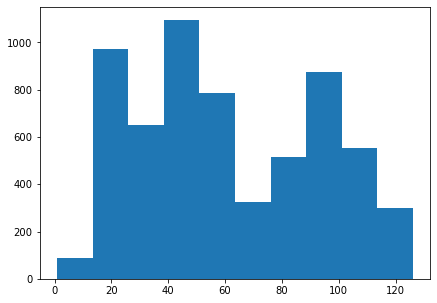

In [34]:
plt.figure(figsize=(7,5))
plt.hist(df['RunTime'])
plt.show()

C:\Users\abodk222\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RunTime', ylabel='Density'>

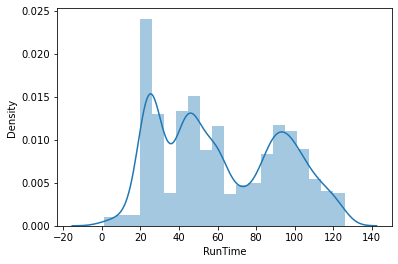

In [35]:
sns.distplot(df['RunTime'])

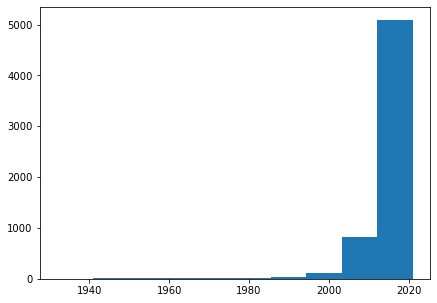

In [36]:
plt.figure(figsize=(7,5))
plt.hist(df['year_start'])
plt.show()

In [37]:
qyearstart=df['year_start'].quantile(0.08)
df=df[df['year_start']>qyearstart]

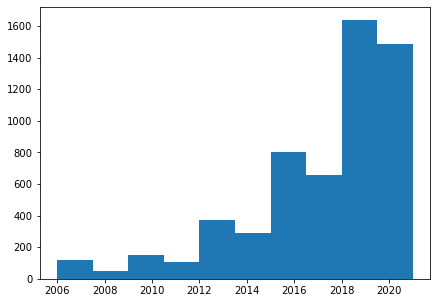

In [38]:
plt.figure(figsize=(7,5))
plt.hist(df['year_start'])
plt.show()

C:\Users\abodk222\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year_start', ylabel='Density'>

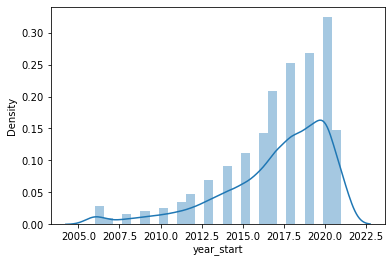

In [39]:
sns.distplot(df['year_start'])

In [40]:
df=df.fillna(2023)

In [41]:
df

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,year_start,year_end
0,Blood Red Sky,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,21062,121.0,2021,2023
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...",17870,25.0,2021,2023
2,The Walking Dead,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...",885805,44.0,2010,2022
3,Rick and Morty,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...",414849,23.0,2013,2023
4,Outer Banks,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cl...",25858,50.0,2020,2023
...,...,...,...,...,...,...,...,...,...
6519,Sexify,"Comedy, Drama",6.8,"Monika's idea for gathering data is a hit, but...",Director:Kalina Alabrudzinska| Stars:A...,108,38.0,2021,2023
6520,Sexify,"Comedy, Drama",7.1,After facing their parents at Easter breakfast...,Director:Kalina Alabrudzinska| Stars:A...,103,37.0,2021,2023
6521,Sexify,"Comedy, Drama",6.9,After getting an anonymous tip about the copul...,Director:Kalina Alabrudzinska| Stars:A...,96,40.0,2021,2023
6522,Sexify,"Comedy, Drama",7.1,The big pitch at the university tech competiti...,Director:Kalina Alabrudzinska| Stars:A...,100,47.0,2021,2023


In [46]:
df.to_csv('MOVIES PREDICTION')

In [43]:
df.isnull().sum()

MOVIES        0
GENRE         0
RATING        0
ONE-LINE      0
STARS         0
VOTES         0
RunTime       0
year_start    0
year_end      0
dtype: int64

In [44]:
df.loc[df['MOVIES']=='Dexter']

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,year_start,year_end
6,Dexter,"Crime, Drama, Mystery",8.6,"By day, mild-mannered Dexter is a blood-spatte...","Stars:Michael C. Hall, Jennife...",665387,53.0,2006,2013
